**References:**


1.   https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21
2.   https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa
3.   https://www.simplypsychology.org/normal-distribution.html
4.   https://conjointly.com/kb/descriptive-statistics/
5.   https://www.investopedia.com/terms/d/descriptive_statistics.asp#toc-what-is-descriptive-statistics
6.   https://towardsdatascience.com/understand-q-q-plot-using-simple-python-4f83d5b89f8f



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/stocks_closes.csv')

In [ ]:
data

,Unnamed: 0,ALXN,WMT,NWSA,COST,DPS,WM,EXC,CRM,AXP,...,MAA,LH,NAVI,TSN,HCN,PNC,UAL,WRK,AMP,PKI
0,2016-08-12,133.44,73.89,13.51,169.04,97.23,66.67,34.94,81.63,65.38,...,102.15,140.05,13.49,75.37,78.36,85.00,47.10,44.47,95.60,54.41
1,2016-08-15,136.07,73.32,13.65,168.73,97.00,66.23,34.63,78.92,65.63,...,97.15,139.77,13.82,75.09,77.75,85.63,48.01,44.00,96.85,54.61
2,2016-08-16,133.76,72.89,13.68,168.41,95.21,64.97,34.23,77.96,65.30,...,94.01,138.89,13.91,74.25,76.67,85.67,47.99,44.86,96.54,54.71
3,2016-08-17,133.06,72.93,13.76,167.96,95.89,65.41,34.58,76.32,65.68,...,95.02,138.24,14.54,74.38,77.00,85.78,48.18,45.49,97.22,54.91
4,2016-08-18,132.43,74.30,13.75,167.75,95.64,64.92,34.71,76.91,65.63,...,94.30,138.71,14.56,75.03,76.89,85.46,47.60,45.57,97.17,54.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2017-08-07,138.33,81.28,14.34,156.95,91.06,75.39,38.22,90.50,85.85,...,104.02,158.21,14.55,66.90,71.92,131.11,68.39,57.16,147.29,65.80
248,2017-08-08,136.04,81.59,14.24,157.75,90.31,75.34,38.21,90.26,85.94,...,104.36,157.43,14.48,65.02,71.94,132.36,67.79,56.56,148.80,64.03
249,2017-08-09,136.85,81.61,14.17,156.86,90.32,75.23,37.70,90.12,85.69,...,105.09,157.75,14.15,64.66,71.24,131.73,67.06,56.14,147.95,64.25
250,2017-08-10,132.30,80.66,13.68,156.64,90.38,74.81,37.74,87.63,84.56,...,104.48,156.40,13.70,64.87,70.60,128.99,65.24,55.23,143.79,62.95


# univariate analysis

the aim of univariate analysis is to examine the properties of a random variable's distribution. Three main properties are to be explored:


1.   distribution
2.   central tendancy
3.   dispersion



In [ ]:
#we will work on the first stock (ALXN)
ALXN=data.iloc[:,1]

**1-the distribution**

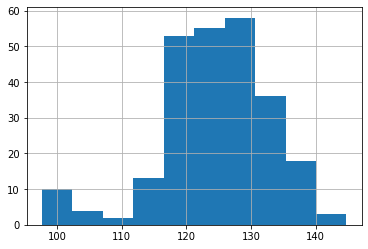

In [ ]:
#method 1: dataframe.plot()
ALXN.hist()

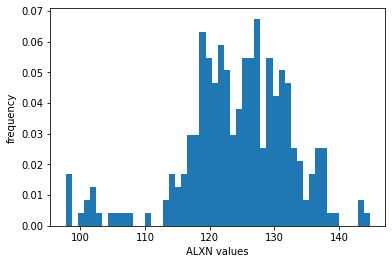

In [ ]:
#m2: with plt (and we will continue with it)
#plot the histogram of ALXN with 50 bins

plt.hist(x=ALXN,bins=50,density=True)
plt.xlabel('ALXN values')
plt.ylabel('frequency')
plt.show()

Let's change the number of bins to 10 and see the effect

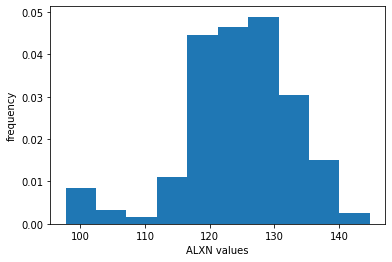

In [ ]:

plt.hist(x=ALXN,bins=10,density=True)
plt.xlabel('ALXN values')
plt.ylabel('frequency')
plt.show()

the higher is the number of bins the more precise is the distribution of ALXN.

**2-central tendancy**

the central tendancy is an estimate of "the center" of the data. There are basically three metrics that contribute in this estimation:



*   mean
*   median
*   mode



In [ ]:
ALXN.mean()

124.36416666666665

In [ ]:
ALXN.median()

125.07

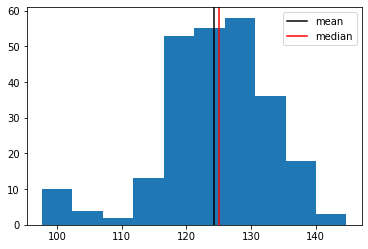

In [ ]:
ALXN.hist(grid=False)
plt.axvline(x=ALXN.mean(),ymin=0,ymax=60,label='mean',color='k')
plt.axvline(x=ALXN.median(),ymin=0,ymax=60,label='median',color='r')
plt.legend()
plt.show()

**3-dispersion:**



*   standard deviation/variance
*   min, max, quartiles
*   boxplot
*   skewness



In [ ]:
#variance
ALXN.var()

72.72849611553784

In [ ]:
#standard deviation = sqrt(variance)
ALXN.std()

8.528100381417765

In [ ]:
# central tendancy and dispersion metrics
ALXN.describe()

count    252.000000
mean     124.364167
std        8.528100
min       97.700000
25%      119.992500
50%      125.070000
75%      130.082500
max      144.770000
Name: ALXN, dtype: float64

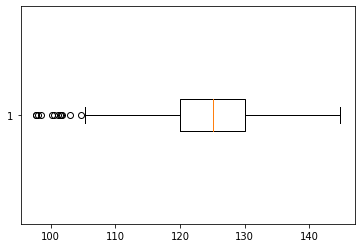

In [ ]:
#boxplot
plt.boxplot(ALXN,vert=False)
plt.show()

the boxplot visualizes:


*   min & max values: the most left line & the most right line
*   1st quartile Q1, median & 3rd quartile Q3: the three vertical lines inside the box
*   outliers: the circles that are situated below Min (and above Max)

Note:


*   Min = Q1 - 1.5 IQR, where IQR=Q3-Q1
*   Max = Q3 + 1.5 IQR




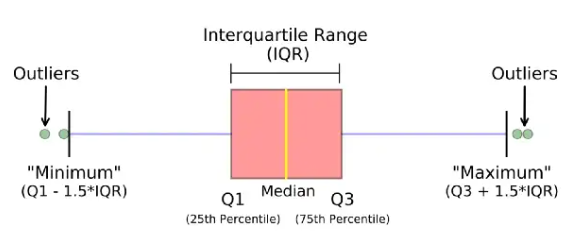

(the image is taken from [1])

**skewness**

skewness is a measure of the assymetry of a data distribution about its mean. Three cases are to be distinguished:


*   0: the distribution is symetric.
*   negative: the distribution is left-tailed.
*   positive: the distribution is right-tailed.

The figure below is from [2].



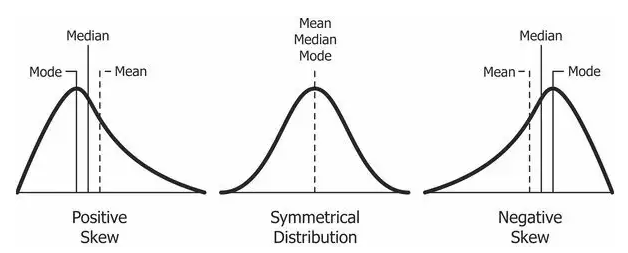

In [ ]:
ALXN.skew()

-0.7857421088932329

**verify the normality of the data**

qqplot is a graphical method that compares the quantiles of two probability distributions.

In our case we plot our sample quantiles against the quantiles of a theoretical normal distribution. Two cases are possible:


*   if the quantiles of both samples are situated roughly on the same line then we can say that our sample data is normal.
*   if not, our sample data is not normal.



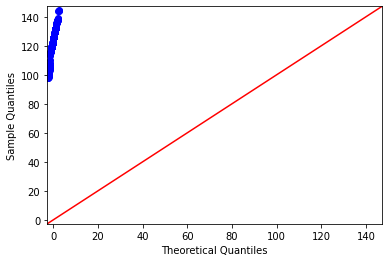

In [ ]:
#the x=y red line represents the theoretical normal distribution quantiles

fig = sm.qqplot(ALXN, line='45')
plt.show()

It is clear from the qqplot that our sample data is not normal. The divergence from the normal theoretical quantiles is very high.

**recall: normal/Gaussian distribution**

the normal distribution is the most frequent and studied data distribution. It is defined by two parameters:


*   mean
*   variance


It has also some interesting properties such as:


*   skewness=0
*   mean=median=mode





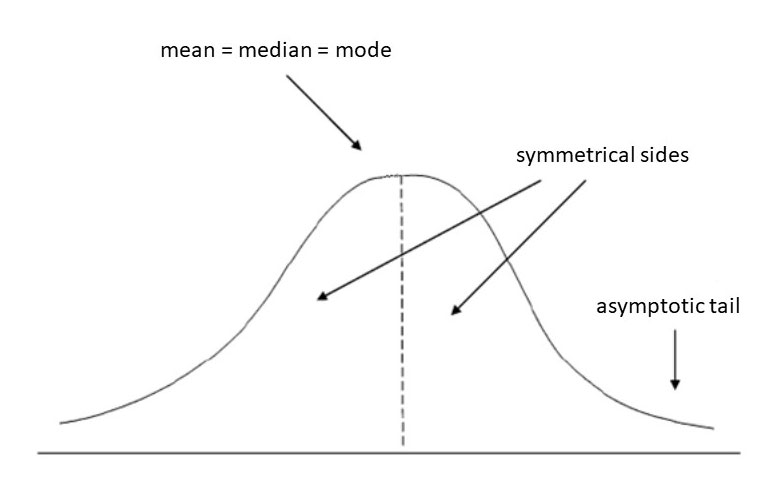

(taken from [3])

# multivariate analysis

multivariate analysis aims to study the causality between different random variables.

In [ ]:
#select 10 first stocks
df=data.iloc[: , 1:11]

In [ ]:
#checking the # missing values per stock
df.isna().sum()

ALXN    0
WMT     0
NWSA    0
COST    0
DPS     0
WM      0
EXC     0
CRM     0
AXP     0
PXD     0
dtype: int64

In [ ]:
df

,ALXN,WMT,NWSA,COST,DPS,WM,EXC,CRM,AXP,PXD
0,133.44,73.89,13.51,169.04,97.23,66.67,34.94,81.63,65.38,176.52
1,136.07,73.32,13.65,168.73,97.00,66.23,34.63,78.92,65.63,179.15
2,133.76,72.89,13.68,168.41,95.21,64.97,34.23,77.96,65.30,178.77
3,133.06,72.93,13.76,167.96,95.89,65.41,34.58,76.32,65.68,180.30
4,132.43,74.30,13.75,167.75,95.64,64.92,34.71,76.91,65.63,183.91
...,...,...,...,...,...,...,...,...,...,...
247,138.33,81.28,14.34,156.95,91.06,75.39,38.22,90.50,85.85,129.64
248,136.04,81.59,14.24,157.75,90.31,75.34,38.21,90.26,85.94,135.38
249,136.85,81.61,14.17,156.86,90.32,75.23,37.70,90.12,85.69,137.55
250,132.30,80.66,13.68,156.64,90.38,74.81,37.74,87.63,84.56,135.26


**correlation**



*  Correlation is a statistical measure that indicates to which degree two random variables are linearly dependant on each other.
*  Correlation is a real value that lies between -1 and +1.



In [ ]:
#compute the correlation between the different stocks
df.corr()

,ALXN,WMT,NWSA,COST,DPS,WM,EXC,CRM,AXP,PXD
ALXN,1.000000,-0.266310,0.064292,-0.271585,-0.082881,-0.120838,0.061824,-0.186857,-0.020302,-0.001845
WMT,-0.266310,1.000000,0.531774,0.289259,0.188327,0.513254,0.495733,0.737272,0.480816,-0.761545
NWSA,0.064292,0.531774,1.000000,-0.013578,0.219278,-0.075927,0.261357,0.400569,-0.015573,-0.414249
COST,-0.271585,0.289259,-0.013578,1.000000,0.633653,0.521981,0.450806,0.504713,0.440727,0.053778
DPS,-0.082881,0.188327,0.219278,0.633653,1.000000,0.389828,0.592808,0.420981,0.316891,0.071514
WM,-0.120838,0.513254,-0.075927,0.521981,0.389828,1.000000,0.750236,0.730859,0.961990,-0.440222
EXC,0.061824,0.495733,0.261357,0.450806,0.592808,0.750236,1.000000,0.664436,0.766685,-0.455937
CRM,-0.186857,0.737272,0.400569,0.504713,0.420981,0.730859,0.664436,1.000000,0.749588,-0.626035
AXP,-0.020302,0.480816,-0.015573,0.440727,0.316891,0.961990,0.766685,0.749588,1.000000,-0.496928
PXD,-0.001845,-0.761545,-0.414249,0.053778,0.071514,-0.440222,-0.455937,-0.626035,-0.496928,1.000000


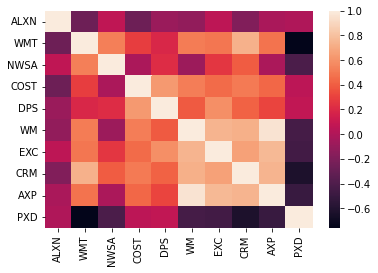

In [ ]:
# plot the heatmap
sns.heatmap(df.corr(),
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns)

plt.show()

WM & AXP are the most correlated variables.

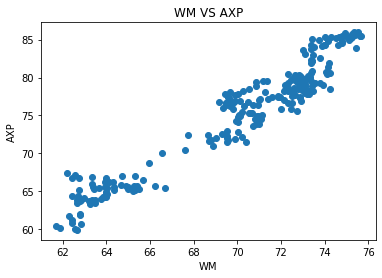

In [ ]:
#scatter plot of WM & AXP

plt.scatter(df.WM,df.AXP)
plt.xlabel('WM')
plt.ylabel('AXP')
plt.title('WM VS AXP')
plt.show()
plt.show()

The visualization shows a clear linear relationship between AXP and WM. This explains the high correlation value.

# Stocks' returns

In [ ]:
#computation of logarithmic returns

#matrix of stocks' values
S=data.iloc[:,1:]
log_return=np.log(S/S.shift(1))
log_return

,ALXN,WMT,NWSA,COST,DPS,WM,EXC,CRM,AXP,PXD,...,MAA,LH,NAVI,TSN,HCN,PNC,UAL,WRK,AMP,PKI
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.019518,-0.007744,0.010309,-0.001836,-0.002368,-0.006622,-0.008912,-0.033762,0.003817,0.014789,...,-0.050186,-0.002001,0.024168,-0.003722,-0.007815,0.007384,0.019136,-0.010625,0.012991,0.003669
2,-0.017122,-0.005882,0.002195,-0.001898,-0.018626,-0.019208,-0.011618,-0.012239,-0.005041,-0.002123,...,-0.032855,-0.006316,0.006491,-0.011250,-0.013988,0.000467,-0.000417,0.019357,-0.003206,0.001829
3,-0.005247,0.000549,0.005831,-0.002676,0.007117,0.006750,0.010173,-0.021261,0.005802,0.008522,...,0.010686,-0.004691,0.044295,0.001749,0.004295,0.001283,0.003951,0.013946,0.007019,0.003649
4,-0.004746,0.018611,-0.000727,-0.001251,-0.002611,-0.007519,0.003752,0.007701,-0.000762,0.019824,...,-0.007606,0.003394,0.001375,0.008701,-0.001430,-0.003737,-0.012111,0.001757,-0.000514,0.000910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.012292,0.009891,0.015461,0.003255,0.004402,-0.001723,0.001309,0.000553,-0.001397,-0.043029,...,0.002503,-0.002777,0.019432,0.055314,0.001252,-0.008052,-0.007575,-0.002970,-0.003727,0.023216
248,-0.016693,0.003807,-0.006998,0.005084,-0.008270,-0.000663,-0.000262,-0.002655,0.001048,0.043324,...,0.003263,-0.004942,-0.004823,-0.028504,0.000278,0.009489,-0.008812,-0.010552,0.010200,-0.027268
249,0.005936,0.000245,-0.004928,-0.005658,0.000111,-0.001461,-0.013437,-0.001552,-0.002913,0.015902,...,0.006971,0.002031,-0.023054,-0.005552,-0.009778,-0.004771,-0.010827,-0.007453,-0.005729,0.003430
250,-0.033813,-0.011709,-0.035192,-0.001404,0.000664,-0.005599,0.001060,-0.028019,-0.013275,-0.016789,...,-0.005821,-0.008595,-0.032319,0.003242,-0.009024,-0.021019,-0.027515,-0.016342,-0.028520,-0.020441


we delete the NaN row

In [ ]:

log_return=log_return.iloc[1:,:]
log_return

,ALXN,WMT,NWSA,COST,DPS,WM,EXC,CRM,AXP,PXD,...,MAA,LH,NAVI,TSN,HCN,PNC,UAL,WRK,AMP,PKI
1,0.019518,-0.007744,0.010309,-0.001836,-0.002368,-0.006622,-0.008912,-0.033762,0.003817,0.014789,...,-0.050186,-0.002001,0.024168,-0.003722,-0.007815,0.007384,0.019136,-0.010625,0.012991,0.003669
2,-0.017122,-0.005882,0.002195,-0.001898,-0.018626,-0.019208,-0.011618,-0.012239,-0.005041,-0.002123,...,-0.032855,-0.006316,0.006491,-0.011250,-0.013988,0.000467,-0.000417,0.019357,-0.003206,0.001829
3,-0.005247,0.000549,0.005831,-0.002676,0.007117,0.006750,0.010173,-0.021261,0.005802,0.008522,...,0.010686,-0.004691,0.044295,0.001749,0.004295,0.001283,0.003951,0.013946,0.007019,0.003649
4,-0.004746,0.018611,-0.000727,-0.001251,-0.002611,-0.007519,0.003752,0.007701,-0.000762,0.019824,...,-0.007606,0.003394,0.001375,0.008701,-0.001430,-0.003737,-0.012111,0.001757,-0.000514,0.000910
5,-0.002192,-0.020258,-0.000728,0.001608,-0.007241,0.000770,-0.009844,0.007384,-0.001525,0.009093,...,0.002753,-0.004769,-0.028563,-0.002001,-0.008227,-0.000468,-0.010772,-0.003517,-0.001648,0.006167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.012292,0.009891,0.015461,0.003255,0.004402,-0.001723,0.001309,0.000553,-0.001397,-0.043029,...,0.002503,-0.002777,0.019432,0.055314,0.001252,-0.008052,-0.007575,-0.002970,-0.003727,0.023216
248,-0.016693,0.003807,-0.006998,0.005084,-0.008270,-0.000663,-0.000262,-0.002655,0.001048,0.043324,...,0.003263,-0.004942,-0.004823,-0.028504,0.000278,0.009489,-0.008812,-0.010552,0.010200,-0.027268
249,0.005936,0.000245,-0.004928,-0.005658,0.000111,-0.001461,-0.013437,-0.001552,-0.002913,0.015902,...,0.006971,0.002031,-0.023054,-0.005552,-0.009778,-0.004771,-0.010827,-0.007453,-0.005729,0.003430
250,-0.033813,-0.011709,-0.035192,-0.001404,0.000664,-0.005599,0.001060,-0.028019,-0.013275,-0.016789,...,-0.005821,-0.008595,-0.032319,0.003242,-0.009024,-0.021019,-0.027515,-0.016342,-0.028520,-0.020441


In [ ]:
#add date column to log_return matrix
log_return['date']=data.iloc[1:,0]

<ipython-input-70-9bcc57809400>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_return['date']=data.iloc[1:,0]


**compute the mean log return per stock**

In [ ]:
mean_per_stock=log_return.mean(axis=0)
mean_per_stock

<ipython-input-71-fd2973f408ae>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_per_stock=log_return.mean(axis=0)


ALXN   -0.000015
WMT     0.000336
NWSA   -0.000024
COST   -0.000303
DPS    -0.000291
          ...   
PNC     0.001633
UAL     0.001336
WRK     0.000891
AMP     0.001614
PKI     0.000642
Length: 504, dtype: float64

**compute the mean log return per date**

In [ ]:
mean_per_date=log_return.mean(axis=1)
mean_per_date

<ipython-input-72-8ee12b31540d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_per_date=log_return.mean(axis=1)


1      0.004720
2     -0.006534
3      0.000846
4      0.004719
5      0.000187
         ...   
247    0.000589
248   -0.003067
249   -0.001733
250   -0.014939
251    0.000537
Length: 251, dtype: float64

In [ ]:
#check the type of column "date"
log_return['date']

1      2016-08-15
2      2016-08-16
3      2016-08-17
4      2016-08-18
5      2016-08-19
          ...    
247    2017-08-07
248    2017-08-08
249    2017-08-09
250    2017-08-10
251    2017-08-11
Name: date, Length: 251, dtype: object

In [ ]:
#change date type to "datetime"
log_return['date']=pd.to_datetime(log_return['date'])
log_return['date']

<ipython-input-74-e3b88f0195cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_return['date']=pd.to_datetime(log_return['date'])


1     2016-08-15
2     2016-08-16
3     2016-08-17
4     2016-08-18
5     2016-08-19
         ...    
247   2017-08-07
248   2017-08-08
249   2017-08-09
250   2017-08-10
251   2017-08-11
Name: date, Length: 251, dtype: datetime64[ns]

In [ ]:
#print the mean log return per date

mean_per_date=pd.DataFrame(mean_per_date, columns = ['mean_log_return'])
mean_per_date['date']=log_return['date']
mean_per_date

,mean_log_return,date
1,0.004720,2016-08-15
2,-0.006534,2016-08-16
3,0.000846,2016-08-17
4,0.004719,2016-08-18
5,0.000187,2016-08-19
...,...,...
247,0.000589,2017-08-07
248,-0.003067,2017-08-08
249,-0.001733,2017-08-09
250,-0.014939,2017-08-10


**stocks with highest mean log return**

In [ ]:
#extract the top five rewarding stocks in decreasing order
five_stocks=mean_per_stock.sort_values(ascending=False)[:5]

In [ ]:

five_stocks

NVDA    0.003609
JEC     0.002691
NRG     0.002639
MU      0.002507
AMD     0.002380
dtype: float64

**correlation between the 5 stocks**

In [ ]:
#extract the values of the five top rewarding stocks

five_stocks=data.loc[:,five_stocks.index]

In [ ]:
five_stocks

,NVDA,JEC,NRG,MU,AMD
0,63.04,26.76,12.72,14.93,6.73
1,62.98,27.12,12.61,15.53,6.95
2,62.60,26.84,12.30,15.49,6.78
3,61.15,26.64,12.38,15.52,6.68
4,62.10,26.98,12.57,15.77,7.04
...,...,...,...,...,...
247,172.35,52.31,24.50,28.59,13.43
248,170.30,54.12,24.25,28.84,13.11
249,172.11,54.22,24.33,28.58,12.83
250,164.74,52.68,24.39,27.49,12.12


compute the correlation matrix relative to these five stocks

In [ ]:
five_stocks.corr()

,NVDA,JEC,NRG,MU,AMD
NVDA,1.000000,0.705379,0.803360,0.898480,0.755901
JEC,0.705379,1.000000,0.759976,0.873039,0.809633
NRG,0.803360,0.759976,1.000000,0.796213,0.802157
MU,0.898480,0.873039,0.796213,1.000000,0.839561
AMD,0.755901,0.809633,0.802157,0.839561,1.000000


a high correlation is observed between the different stocks

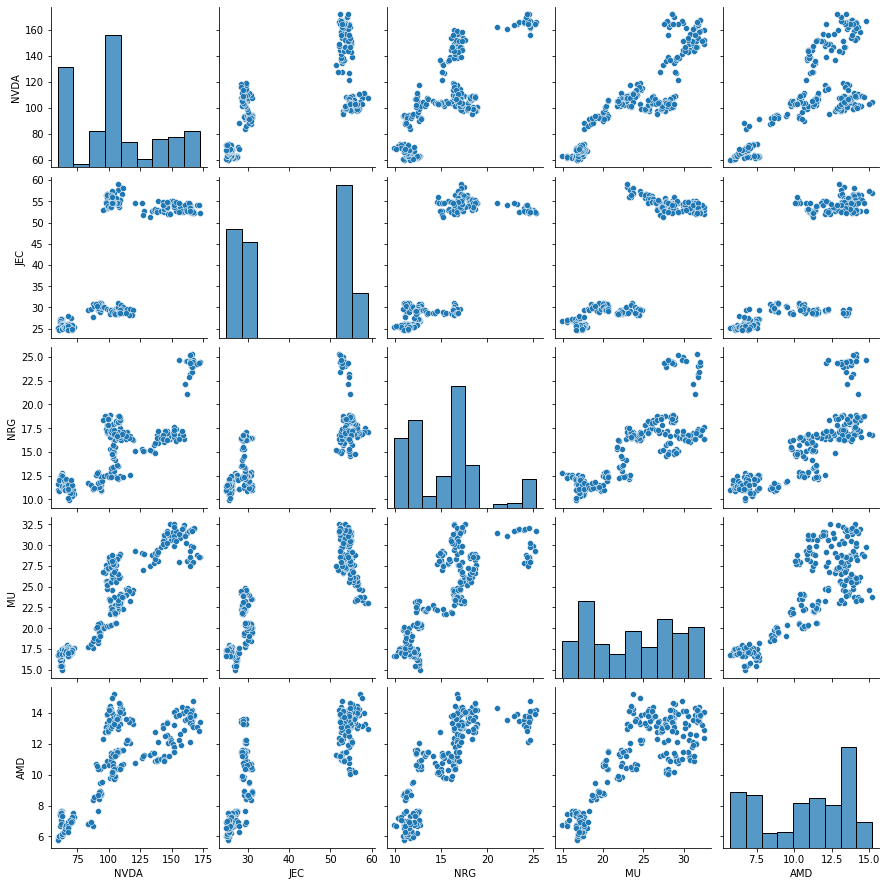

In [ ]:
sns.pairplot(five_stocks)